# Vektorisierung

In [242]:
import pandas as pd

Dataset "train_cleaned" importieren

In [243]:
df = pd.read_csv('../../../data/twitter_hate-speech/train_cleaned.csv', index_col=0)

In [244]:
pd.set_option('display.max_colwidth', None)

In [245]:
df.head()

,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father selfish drag kid run,1,['#run'],NaN
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use cause offer van,2,"['#lyft', '#disapointed', '#getthanked']",NaN
3,0,bihday your majesty,bihday majesty,0,[],NaN
4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model take time mobile phone kiss sunglass mouth tongue sweat droplet sweat droplet sweat droplet,0,['#model'],":mobile_phone:,:kissing_face_with_smiling_eyes:,:smiling_face_with_sunglasses:,:mouth:,:tongue:,:sweat_droplets:,:sweat_droplets:,:sweat_droplets:"
5,0,factsguide: society now #motivation,factsguide society motivation,0,['#motivation'],NaN


Da es leere tweet_cleaned gibt müssen diese hier entfernt werden. Ansonsten werfen alle 3 Methoden Fehler

In [246]:
df = df[df['tweet_cleaned'].notna()]

## Bag of Words

In [247]:
# Da es leere tweet_cleaned gibt müssen diese hier entfernt werden. Ansonsten wirft die nächste Zelle einen Fehler
df = df[df['tweet_cleaned'].notna()]

In [248]:
# Doku: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # CountVectorizer(binary=True) würde nur 0 und 1 ausgeben
X_bow = vectorizer.fit_transform(df.tweet_cleaned)

In [249]:
print(vectorizer.get_feature_names())

['aamp', 'aap', 'ab', 'abandon', 'abasel', 'abba', 'abc', 'abe', 'ability', 'able', 'ableism', 'abroad', 'absolute', 'absolutely', 'abstract', 'abundance', 'abuse', 'ac', 'academy', 'acc', 'accent', 'accept', 'acceptable', 'acceptance', 'access', 'accessory', 'accident', 'accidentally', 'accomplish', 'accord', 'account', 'accountable', 'accuse', 'ace', 'ache', 'achieve', 'achievement', 'acknowledge', 'acoustic', 'acquire', 'across', 'act', 'action', 'active', 'activist', 'activity', 'actor', 'actorslife', 'actress', 'actual', 'actually', 'ad', 'adam', 'adapt', 'add', 'addict', 'addiction', 'addition', 'address', 'adele', 'adida', 'admin', 'administration', 'admire', 'admission', 'admit', 'adopt', 'adorable', 'adore', 'adrenaline', 'adult', 'adultery', 'advance', 'advanced', 'advantage', 'adve', 'adveise', 'adventure', 'advice', 'advise', 'advocate', 'af', 'affair', 'affect', 'affirmation', 'afford', 'afghan', 'afghanistan', 'afraid', 'africa', 'african', 'aft', 'afternoon', 'aftr', 'ag

C:\Users\svenw\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [250]:
print(X_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [251]:
print(X_bow[1:10, :].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [252]:
# Erster Test NB

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

y = df.label
clf = MultinomialNB()

clf.fit(X_bow,y)

ypred = clf.predict(X)

print("Accuracy: ", accuracy_score(y, ypred))

Accuracy:  0.9523671742196824


## TF_IDF

In [253]:
# Doku https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df.tweet_cleaned)

In [254]:
print(tfidf_vectorizer.get_feature_names_out())

['aamp' 'aap' 'ab' ... 'zootopia' 'zoro' 'zzz']


In [255]:
print(X_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [256]:
print(X_tfidf[1:10, :].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [257]:
# Erster Test NB

y = df.label
clf = MultinomialNB()

clf.fit(X_tfidf,y)

ypred_tfidf = clf.predict(X_tfidf)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.954609569966364


## Word2Vec

In [258]:
from nltk import word_tokenize
from gensim.models import Word2Vec
import numpy as np

data = df['tweet_cleaned'].map(word_tokenize)

In [259]:
data

id
1                                                                                        [father, selfish, drag, kid, run]
2                                                                            [thank, lyft, credit, use, cause, offer, van]
3                                                                                                        [bihday, majesty]
4        [model, take, time, mobile, phone, kiss, sunglass, mouth, tongue, sweat, droplet, sweat, droplet, sweat, droplet]
5                                                                                        [factsguide, society, motivation]
                                                               ...                                                        
31956           [less, week, grin, sweat, fold, hand, medium, light, skin, tone, tropical, drink, sunglass, musical, note]
31957                                                                         [fishing, tomorrow, wait, first, time, year]
31958        

In [260]:
w2v = Word2Vec(data,window=4, min_count=1, sg=0) 
# sg=1: Skip-Gram
# sg=0: Continuous Bag of Words

In [261]:
w2v.train(data, total_examples=len(df['tweet_cleaned']), epochs=20)
# epochs = Anzahl Iterationen

(3895461, 4126720)

In [262]:
w2v.wv.most_similar(positive="motivation")

[('positivity', 0.8551440834999084),
 ('inspiration', 0.8509970903396606),
 ('inspirational', 0.7986737489700317),
 ('bestseller', 0.7966201901435852),
 ('quoteoftheday', 0.7846786379814148),
 ('belief', 0.7734766006469727),
 ('motivate', 0.7620171904563904),
 ('clarity', 0.7573019862174988),
 ('focus', 0.7502079010009766),
 ('entrepreneur', 0.7492209672927856)]

In [263]:
w2v.wv.most_similar(negative="motivation")

[('meet', 0.38776740431785583),
 ('month', 0.3685368001461029),
 ('august', 0.3510117530822754),
 ('yr', 0.34943756461143494),
 ('driver', 0.34151437878608704),
 ('date', 0.3371161222457886),
 ('july', 0.3349956274032593),
 ('st', 0.3319697976112366),
 ('th', 0.33012112975120544),
 ('attend', 0.3262748420238495)]

In [264]:
size = 100

def w2v_vector(tokenized_tweet, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokenized_tweet:
        try:
            vec += w2v.wv[word].reshape((1, size))
            count += 1
        except KeyError:
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [265]:
X_w2v = np.zeros((len(data),size))


In [266]:
X_w2v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [267]:
for i in range(len(data)):
    X_w2v[i,:] = w2v_vector(data.iloc[i],size)

In [268]:
X_w2v

array([[-0.07510655,  0.21020058, -0.20256673, ..., -0.94751001,
        -0.31181885, -0.79616607],
       [-0.41417132,  0.50929316,  0.16367714, ..., -0.3256411 ,
        -0.21706779, -0.49237861],
       [ 0.17342084,  0.15390019, -0.45567932, ..., -0.13855035,
         0.22340842,  0.70906802],
       ...,
       [-0.56916667, -0.79364092,  0.7017216 , ..., -0.62957028,
         0.43065851, -0.18402299],
       [-0.3508688 ,  0.48442827, -0.09838277, ..., -0.0809759 ,
        -0.0404827 , -0.05712749],
       [-0.65885877,  0.54555934, -0.93903185, ...,  0.26628659,
         0.17794399,  0.15859561]])

In [269]:
w2v_df = pd.DataFrame(X_w2v)

In [270]:
w2v_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.075107,0.210201,-0.202567,0.212871,0.265801,-0.380362,-0.015976,0.735340,-0.375814,0.392438,...,0.514987,0.585587,-0.810313,-0.244618,1.473476,0.071308,0.173422,-0.947510,-0.311819,-0.796166
1,-0.414171,0.509293,0.163677,0.000648,0.035271,-0.694777,0.008670,0.350802,-0.187330,0.072890,...,0.271371,0.214709,0.404107,-0.025438,0.357833,0.204036,-0.166251,-0.325641,-0.217068,-0.492379
2,0.173421,0.153900,-0.455679,0.278553,-0.429177,0.095605,-0.302596,0.554988,-0.749033,-0.090800,...,0.379173,0.653875,-0.001721,0.158561,0.602873,0.515263,0.711450,-0.138550,0.223408,0.709068
3,-0.456705,-0.808773,-0.129696,0.164700,0.145178,-0.522028,0.181228,0.238509,-0.386232,-0.686608,...,0.985449,-0.125787,-0.049569,0.114986,-0.110593,0.531973,-0.219120,-1.274767,0.184988,0.088850
4,-0.331064,-0.205597,0.261909,-0.110395,0.741096,-0.384489,0.183654,0.652258,0.171810,0.168081,...,0.018998,-0.166995,-0.006181,-0.181864,0.277631,0.061244,0.351654,-0.554809,-0.178699,-0.694216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27644,-0.307263,-1.067342,-0.514286,0.085829,0.662990,-0.759909,-0.246296,0.804958,-0.741169,-0.915937,...,1.342914,-0.611232,0.580346,0.347386,-0.377438,0.393221,-0.280420,-0.950433,0.238793,-0.248770
27645,-0.736218,0.565574,-0.450147,-0.637533,0.064107,-0.789523,-0.383129,0.757644,0.103039,-0.905960,...,0.881541,0.419289,0.416059,0.105347,1.277920,1.167460,-0.157431,0.032541,0.359085,0.582974
27646,-0.569167,-0.793641,0.701722,-0.228538,0.232195,-0.009322,-0.038014,0.651153,0.109415,-0.905670,...,0.727808,-0.063650,0.295451,-0.174616,0.291898,0.018962,0.236138,-0.629570,0.430659,-0.184023
27647,-0.350869,0.484428,-0.098383,0.061577,-0.044750,-0.191503,-0.067656,0.286544,-0.606969,-0.085290,...,0.396091,0.261346,0.027554,0.211411,0.579161,0.152902,0.232472,-0.080976,-0.040483,-0.057127


[Text(0.3982650455769946, 0.9827586206896551, 'X[1] <= 0.473\ngini = 0.122\nsamples = 100.0%\nvalue = [0.935, 0.065]'),
 Text(0.172331014621829, 0.9482758620689655, 'X[82] <= -0.099\ngini = 0.049\nsamples = 65.9%\nvalue = [0.975, 0.025]'),
 Text(0.09571927360632634, 0.9137931034482759, 'X[69] <= 0.331\ngini = 0.025\nsamples = 50.8%\nvalue = [0.987, 0.013]'),
 Text(0.05920103546821171, 0.8793103448275862, 'X[95] <= 0.111\ngini = 0.057\nsamples = 15.6%\nvalue = [0.97, 0.03]'),
 Text(0.03499598731600376, 0.8448275862068966, 'X[21] <= 0.052\ngini = 0.128\nsamples = 4.5%\nvalue = [0.931, 0.069]'),
 Text(0.014657062323833386, 0.8103448275862069, 'X[3] <= -0.206\ngini = 0.223\nsamples = 1.8%\nvalue = [0.872, 0.128]'),
 Text(0.003507673034763545, 0.7758620689655172, 'X[54] <= -0.876\ngini = 0.05\nsamples = 0.6%\nvalue = [0.974, 0.026]'),
 Text(0.002505480739116818, 0.7413793103448276, 'gini = 0.0\nsamples = 0.0%\nvalue = [0.0, 1.0]'),
 Text(0.004509865330410272, 0.7413793103448276, 'X[95] <= -

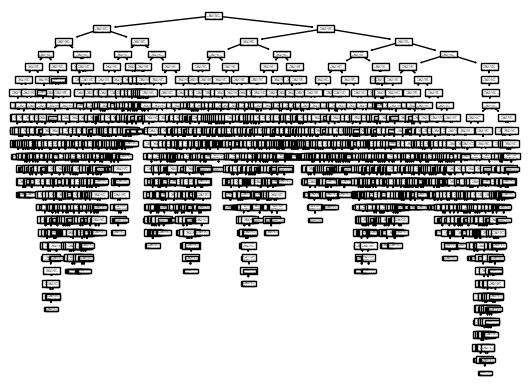

In [271]:
# Erster Test Entscheidungsbaum

from sklearn import tree


y = df.label
clf = tree.DecisionTreeClassifier().fit(X_w2v, y)

tree.plot_tree(clf,proportion='true')

In [272]:
# Erster Test NB
from sklearn.naive_bayes import GaussianNB

y = df.label
clf = GaussianNB()

clf.fit(X_w2v,y)

ypred_tfidf = clf.predict(X_w2v)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.7559043726717061


## FastText

In [273]:
from gensim.models import FastText

In [274]:
ft = FastText(data, window = 5)

In [275]:
ft.train(data, total_examples=len(df['tweet_cleaned']), epochs=20)

(3788380, 4126720)

In [276]:
ft.wv.most_similar(positive="motivation")

[('mondaymotivation', 0.9554091095924377),
 ('motivational', 0.9553945660591125),
 ('tuesdaymotivation', 0.9501006007194519),
 ('inspiration', 0.8636072874069214),
 ('meditation', 0.848187267780304),
 ('affirmation', 0.8179735541343689),
 ('transformation', 0.8126458525657654),
 ('innovation', 0.8108956217765808),
 ('inspirational', 0.7933083772659302),
 ('position', 0.7922620177268982)]

In [277]:
ft.wv.most_similar(negative="motivation")

[('yr', 0.3946792781352997),
 ('xbox', 0.3707064986228943),
 ('die', 0.3409373164176941),
 ('bro', 0.33669108152389526),
 ('snatch', 0.33475953340530396),
 ('hi', 0.3318985104560852),
 ('patch', 0.32425442337989807),
 ('pull', 0.31866365671157837),
 ('gator', 0.31834813952445984),
 ('six', 0.318288117647171)]

In [278]:
size = 100

def ft_vector(tokenized_tweet, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokenized_tweet:
        try:
            vec += ft.wv[word].reshape((1, size))
            count += 1
        except KeyError: 
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [279]:
X_ft = np.zeros((len(data),size))

In [280]:
X_ft

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [281]:
for i in range(len(data)):
    X_ft[i,:] = ft_vector(data.iloc[i],size)

In [282]:
X_ft

array([[-7.56336397e-01, -3.24875508e-01, -2.13537802e-01, ...,
        -5.15507726e-01, -5.01920247e-01,  2.11301363e-01],
       [-6.56830110e-01, -3.19615406e-04, -4.60356292e-01, ...,
         2.70399418e-01,  6.78386516e-01,  1.92146772e-01],
       [ 9.16283656e-01,  5.82955375e-01,  5.08149989e-01, ...,
        -1.55170740e+00, -4.08796543e-01, -2.13219658e-01],
       ...,
       [-3.32681340e-01, -4.81933145e-01, -1.57857239e-01, ...,
        -1.19710247e+00,  2.81998376e-01, -3.06672146e-01],
       [-3.57209825e-02, -1.84847646e-02, -2.80332267e-01, ...,
        -4.43013919e-02,  3.25961802e-01,  3.86474369e-01],
       [-5.68849376e-01,  2.48813052e-01, -4.76860069e-01, ...,
        -4.94301693e-01, -3.19525312e-01, -1.37581357e-01]])

In [283]:
ft_df = pd.DataFrame(X_ft)

In [284]:
ft_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.756336,-0.324876,-0.213538,-0.293679,-0.080560,0.202412,0.148699,-0.195851,-0.654331,-0.175352,...,-0.977007,-1.002674,-0.737380,-0.403177,0.908685,-0.236507,-0.321057,-0.515508,-0.501920,0.211301
1,-0.656830,-0.000320,-0.460356,0.424033,0.308105,0.321082,-0.169992,-0.018388,0.693912,-0.574245,...,-0.179503,-0.348266,-0.252348,0.043978,-0.295824,0.367659,0.193474,0.270399,0.678387,0.192147
2,0.916284,0.582955,0.508150,0.575223,-0.197327,0.418150,0.785368,-0.986657,0.099105,-0.714508,...,0.910045,1.081112,-0.152684,0.528052,-0.871409,-0.794957,-0.629395,-1.551707,-0.408797,-0.213220
3,-0.728415,0.018778,-0.321428,-0.005109,-0.185144,-0.475363,-0.459744,0.003459,-0.501129,-0.404551,...,-0.224785,-0.278862,-0.457683,-0.436931,-0.261268,-0.525151,0.107158,-2.251065,0.790357,-0.177597
4,-1.466862,0.460898,-0.605106,0.880405,-0.626581,0.961405,-0.256018,-0.178307,0.285580,-0.951440,...,-0.651279,0.207828,-0.517559,0.527917,-0.946034,-0.134849,-0.335479,-0.174359,0.181526,0.395662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27644,0.510814,0.379125,0.463332,0.408002,-0.548059,-0.150018,-1.194034,-1.037051,-0.289478,-0.367780,...,0.757065,-0.334586,-0.973524,-0.576490,-0.078150,-1.217115,-0.138710,-2.292455,1.490664,0.214096
27645,0.472469,-0.339535,-0.518417,-0.169857,1.195251,0.241811,0.440298,0.818393,-0.115329,-0.112404,...,0.260631,0.170117,-0.105225,-0.634257,0.664033,0.312407,0.405730,-0.908567,0.267956,0.391197
27646,-0.332681,-0.481933,-0.157857,-0.350665,0.484023,0.123494,1.121874,0.147119,-0.379634,-0.965433,...,-0.565684,-0.315134,0.165785,-1.502536,0.337637,-0.199611,-0.140542,-1.197102,0.281998,-0.306672
27647,-0.035721,-0.018485,-0.280332,0.025832,-0.085431,0.229126,0.304046,0.411847,0.249789,-0.791308,...,-0.592811,0.108954,0.062257,-0.103339,-0.054834,0.078425,0.371840,-0.044301,0.325962,0.386474


[Text(0.4483998737845415, 0.9821428571428571, 'X[70] <= -0.175\ngini = 0.122\nsamples = 100.0%\nvalue = [0.935, 0.065]'),
 Text(0.18148531443006052, 0.9464285714285714, 'X[20] <= -0.209\ngini = 0.317\nsamples = 18.5%\nvalue = [0.803, 0.197]'),
 Text(0.053905851414634554, 0.9107142857142857, 'X[20] <= -0.578\ngini = 0.136\nsamples = 9.0%\nvalue = [0.927, 0.073]'),
 Text(0.013040935429948525, 0.875, 'X[64] <= -1.25\ngini = 0.071\nsamples = 5.8%\nvalue = [0.963, 0.037]'),
 Text(0.0031855720134225402, 0.8392857142857143, 'X[3] <= -0.322\ngini = 0.375\nsamples = 0.1%\nvalue = [0.75, 0.25]'),
 Text(0.002123714675615027, 0.8035714285714286, 'X[11] <= 0.538\ngini = 0.269\nsamples = 0.1%\nvalue = [0.84, 0.16]'),
 Text(0.0010618573378075136, 0.7678571428571429, 'gini = 0.0\nsamples = 0.0%\nvalue = [0.0, 1.0]'),
 Text(0.0031855720134225402, 0.7678571428571429, 'X[87] <= -0.884\ngini = 0.159\nsamples = 0.1%\nvalue = [0.913, 0.087]'),
 Text(0.002123714675615027, 0.7321428571428571, 'gini = 0.0\nsam

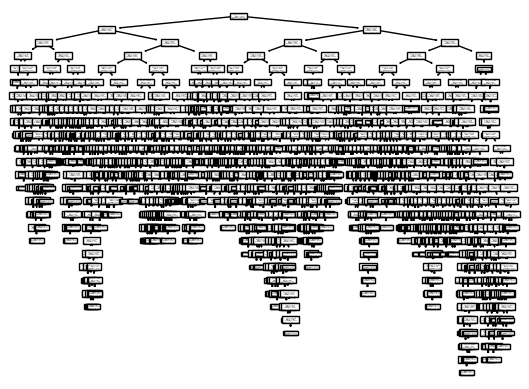

In [285]:
# Erster Test Entscheidungsbaum
from sklearn import tree

y = df.label
clf = tree.DecisionTreeClassifier().fit(X_ft, y)

tree.plot_tree(clf,proportion='true')

In [286]:
# Erster Test NB
from sklearn.naive_bayes import GaussianNB

y = df.label
clf = GaussianNB()

clf.fit(X_ft,y)

ypred_tfidf = clf.predict(X_ft)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.7611486853050743
